## 1. Dataset 

In [1]:
# importing required libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
insurance_df= pd.read_csv("insurance-data.csv")

In [3]:
# make a copy of data
df=insurance_df.copy()

In [4]:
# run the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# get number of rows and columns
df.shape



(1338, 7)

In [6]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# get attribute names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# get information about a dataset (dtype, non-null values, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
# detect labels in categorical variables
for col in df.columns.delete([0,2,6]):
    print(col, np.unique(df[col]))
    print(col,'\n', df[col].value_counts())


sex ['female' 'male']
sex 
 male      676
female    662
Name: sex, dtype: int64
children [0 1 2 3 4 5]
children 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
smoker ['no' 'yes']
smoker 
 no     1064
yes     274
Name: smoker, dtype: int64
region ['northeast' 'northwest' 'southeast' 'southwest']
region 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [12]:
# detect missing values
df.isna().sum()#.sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Summary statistics
df.describe() # only for numerical variables
df.describe().T # transpose
df.describe() # for all variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# correlation matrix
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
print('no. of people who have at least 1 child are ',df[df['children']>0].value_counts().sum())
print(df['sex'][df['children']>0].value_counts())
print(df['children'][df['children']>0].value_counts())

no. of people who have at least 1 child are  764
male      391
female    373
Name: sex, dtype: int64
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


####  So, what do I know about dataset?

- The *insurance* dataset has 7 columns (features) and 1338 rows (observations,samples).\
  *Numerical* columns are:
    - *age* (discrete)      - applicant age
    - *bmi* (continuous) - body measure indicator   
    - *children* (discrete) - the number of children per insurance applicant
    - *charges* (continuous) - the mount of applicant charges

  *Categorical* columns are:
    - *sex* (Male/Female) - the gender of the applicant
    - *smoker* (Yes/No) - whether or not the   is a smoker
    - *region* (southeast/southwest/northeast/northwest) - the day when the person paid the bill
    
- There is no missing values.
- tip is in interval [1,10] with overall average tip approx.3 (with standard deviation 1.4) and median 3.6  
- total_bill is approx. between 3 and 51 with overall average 20 (with standard deviation 9) and median 24
- positive correlation (>1) among numerical variables
- the strongest relationship is between total_bill and tip (0.7)

In [17]:
print(df.groupby(['sex','children']).size())

sex     children
female  0           289
        1           158
        2           119
        3            77
        4            11
        5             8
male    0           285
        1           166
        2           121
        3            80
        4            14
        5            10
dtype: int64


In [18]:
df.groupby(['sex','region']).size()

sex     region   
female  northeast    161
        northwest    164
        southeast    175
        southwest    162
male    northeast    163
        northwest    161
        southeast    189
        southwest    163
dtype: int64

In [34]:
df.groupby(['sex','smoker'])['charges'].mean().mean()

20142.626070590406

## 2. Visualization

### **a. Frequency Distribution - Categorical Variables**

###  * COUNT PLOT

- show value counts for a single categorical variable
- can be thought of as a histogram across a categorical, instead of quantitative, variable.

male      676
female    662
Name: sex, dtype: int64


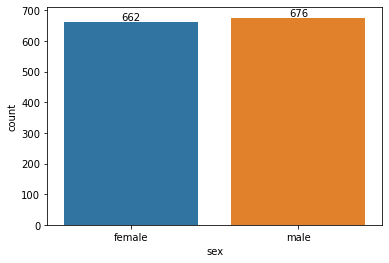

In [20]:
# Apsolute values - the number of records

ax=sns.countplot(x='sex', data=df)
# sns.despine() # no top and right axes spine
ax.bar_label(ax.containers[0])
print(df.sex.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


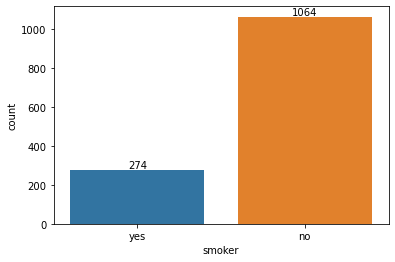

In [25]:
# change orientation, use same color for both label
ax1=sns.countplot(x='smoker', data=df)
ax1.bar_label(ax1.containers[0])
print(df.smoker.value_counts())

<AxesSubplot:xlabel='sex', ylabel='count'>

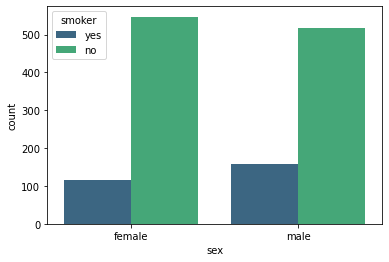

In [29]:
# show value counts for two categorical variables
sns.countplot(x='sex', data=df, hue='smoker', palette='viridis')
# male nonsmoker is larger size

So, we see that:
- Man paid mostly
- non-smokers are the most applicants
- Male and female smoker paid mostly( average=33042&30678)
- Male and female non smoker paid more often less than Male-smoker ( average=8087&8762)
- total mean charges is (20142)

### * CATPLOT

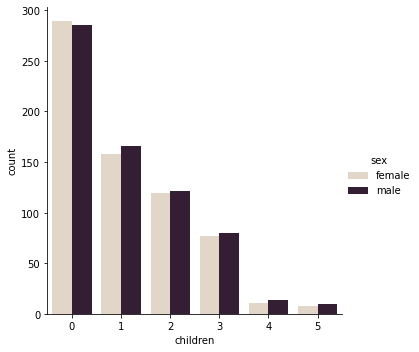

In [42]:
# show value counts for two categorical variables
ax3=sns.catplot(x='children', data=df, hue='sex', palette='ch:.25', kind='count')


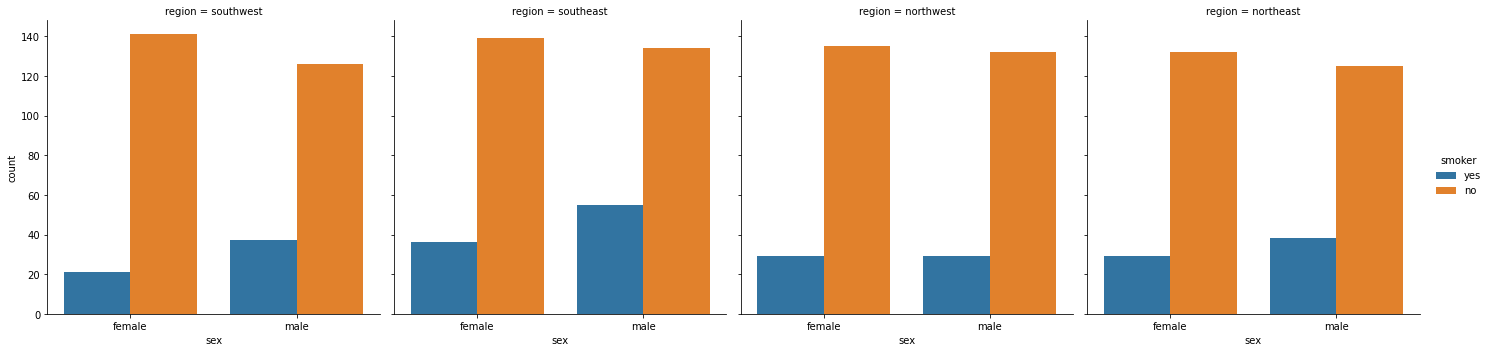

In [43]:
# facet along the columns to show a third categorical variable
sns.catplot(x='sex', hue='smoker', col='region', data=df, kind='count')

count of sex categories per region, they have near values

### * BAR PLOTS

male      50.523169
female    49.476831
Name: sex, dtype: float64


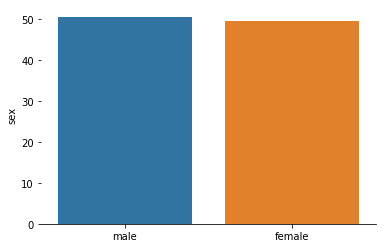

In [47]:
# Relative values - the percentage of records
perc=df['sex'].value_counts(normalize=True)*100
print(perc)
sns.barplot(x=perc.index, y=perc, data=df)
sns.despine(left='True') # no top, left and right axes spine

50.5% of bills were paid by man comapared to 49.5% paid by woman.they are nearly the same

## **b. Distribution of the Numerical Variable**

### * DISTPLOT

- plot a univariate distribution of observations
- combines the histogram & plots the estimated probability density function over the data.
- calculate bin size

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

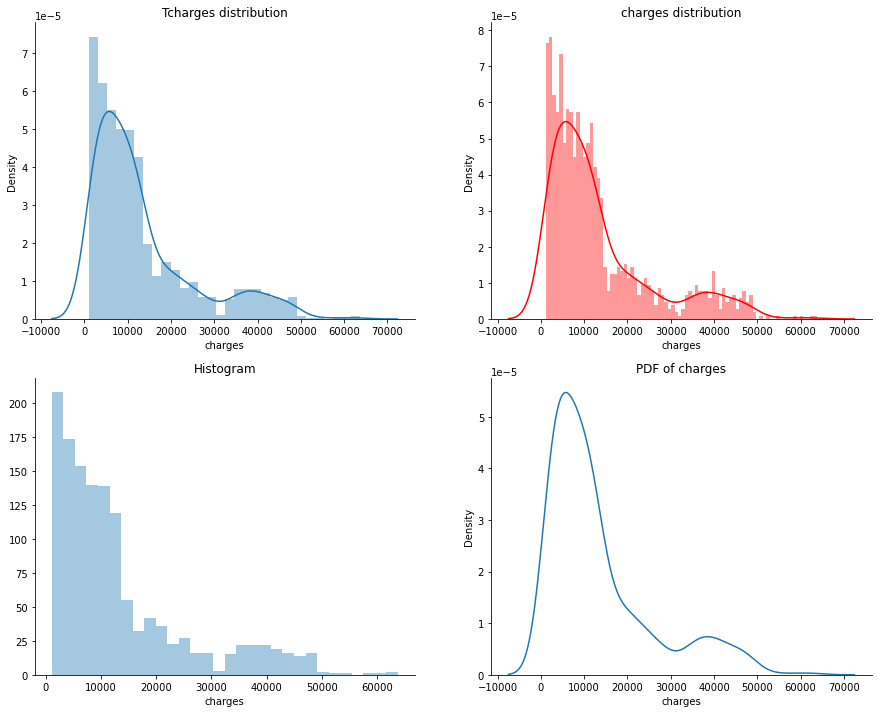

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

# histogram and density function, set title
sns.distplot(df.charges, ax=axes[0,0]).set_title('Tcharges distribution')

#set number of bins and color, set title
sns.distplot(df.charges, bins=80, color='r', ax=axes[0,1]).set_title('charges distribution')

# only histogram, without density function, set title
sns.distplot(df.charges, kde=False, ax=axes[1,0]).set_title('Histogram')

# only density function, without histogram, set title
sns.distplot(df.charges, hist=False, ax=axes[1,1]).set_title('PDF of charges')
sns.despine() # no top and right axes spine

The most of the charge values are in the range of 5000 - 15000.

### * KDE PLOT

- plot density

Text(0.5, 1.0, 'PDF of charges')

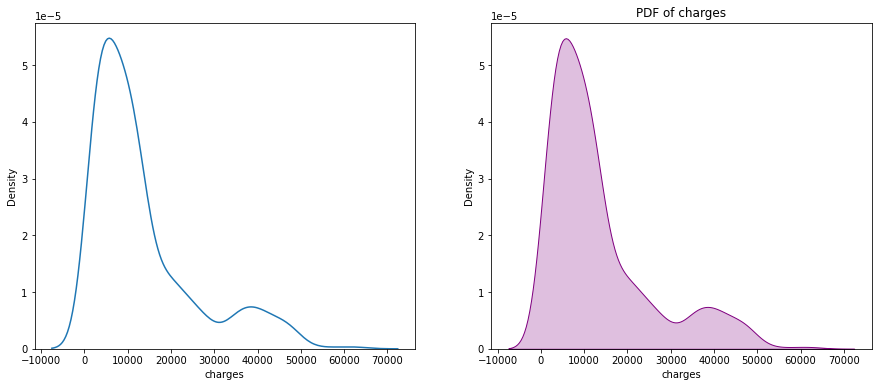

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# simple density function
sns.kdeplot(df.charges, ax=axes[0])

# filled area under the curve, set color, remove legend, set title
sns.kdeplot(df.charges, shade=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of charges')

### * BOX-PLOT

- the box shows the quartiles of the dataset
- the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'bmi outliers')

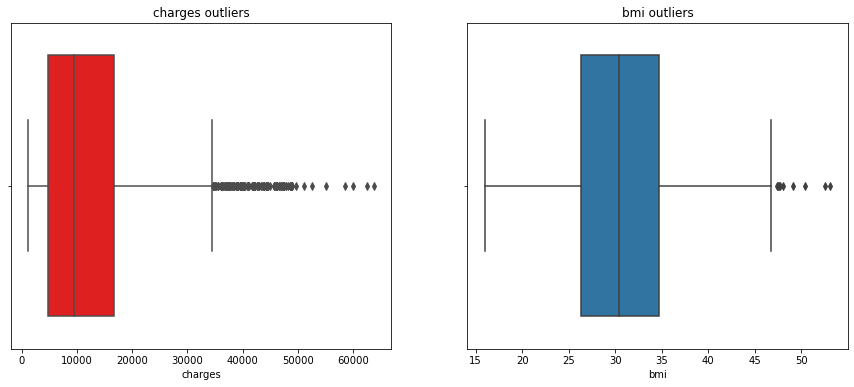

In [62]:
# detect the outliers

fig, axes = plt.subplots(1, 2,figsize=(15,6)) # plot 2 graphs

# use red color, set title
sns.boxplot(x='charges', data=df, color='red', ax=axes[0]).set(title='charges outliers')

# change orientation, set title
sns.boxplot(x='bmi', data=df, orient='v', ax=axes[1]).set_title('bmi outliers')

There are charges/bmi values that 'lie' outside from other charges/bmi values. <br>
Both variables contain outlier candidates. <br>
but we can consider it a normal values

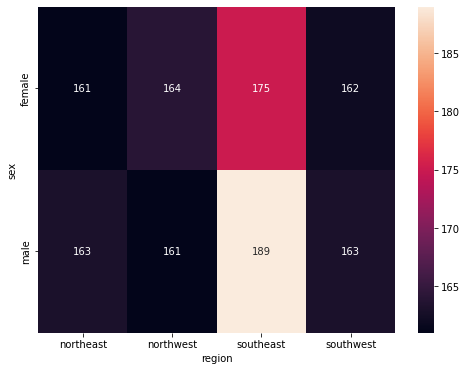

In [92]:
sex_per_region = df.groupby(['sex', 'region']).size().reset_index(name='count')

# Creating a pivot table for the heatmap
pivot_table = sex_per_region.pivot_table(index='sex', columns='region', values='count', fill_value=0)

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True,  fmt='d', cbar=True)
plt.show()

<AxesSubplot:>

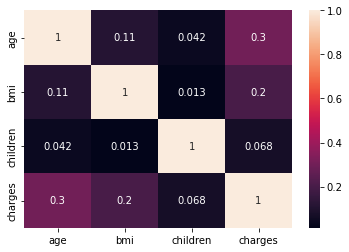

In [85]:
# visualize the correlation matrix
sns.heatmap(data=df.corr(),annot=True) # values of Pearson coefficient